<a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/test_Cellpose-SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cellpose-SAM: superhuman generalization for cellular segmentation

### Install Cellpose-SAM

In [1]:
!pip install git+https://www.github.com/mouseland/cellpose.git

  Cloning https://www.github.com/mouseland/cellpose.git to c:\users\admin\appdata\local\temp\pip-req-build-lxqtp93j
  Resolved https://www.github.com/mouseland/cellpose.git to commit 17fb25f40055ec2636aa708dc4cf6625b8b4735d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/642.4 kB ? eta -:--:--
   ---------------------------------------- 642.4/642.4 kB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ------ --------------------------------- 3.1/19.1 MB 15.3 MB/s eta 0:00:02
   ------------- -------------------------- 6.6/19.1 MB 16.1 MB/s eta 0:00:01
   ---------------------- ----------------- 10.5/19.1 MB 16.8 MB/s eta 0:00:01
   ----------------------------- ---------- 14.2/19.1 MB 17.1 MB/s eta 0:00:01
   ------------------------------------- -- 18.1/19.1 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 16.

DEPRECATION: Loading egg at c:\users\admin\appdata\local\programs\python\python312\lib\site-packages\underthesea-6.8.4-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git 'C:\Users\ADMIN\AppData\Local\Temp\pip-req-build-lxqtp93j'

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)

creating new log file
2025-12-24 15:00:20,148 [INFO] WRITING LOG OUTPUT TO C:\Users\ADMIN\.cellpose\run.log
2025-12-24 15:00:20,148 [INFO] 
cellpose version: 	4.0.8 
platform:       	win32 
python version: 	3.12.0 
torch version:  	2.7.0+cu118
2025-12-24 15:00:21,496 [INFO] ** TORCH CUDA version installed and working. **
2025-12-24 15:00:21,496 [INFO] ** TORCH CUDA version installed and working. **
2025-12-24 15:00:21,496 [INFO] >>>> using GPU (CUDA)
2025-12-24 15:00:23,050 [INFO] Downloading: "https://huggingface.co/mouseland/cellpose-sam/resolve/main/cpsam" to C:\Users\ADMIN\.cellpose\models\cpsam



100%|██████████| 1.15G/1.15G [00:27<00:00, 45.0MB/s]


### Example images

100%|██████████| 21.3M/21.3M [00:03<00:00, 6.04MB/s]
100%|██████████| 1.63M/1.63M [00:01<00:00, 1.10MB/s]


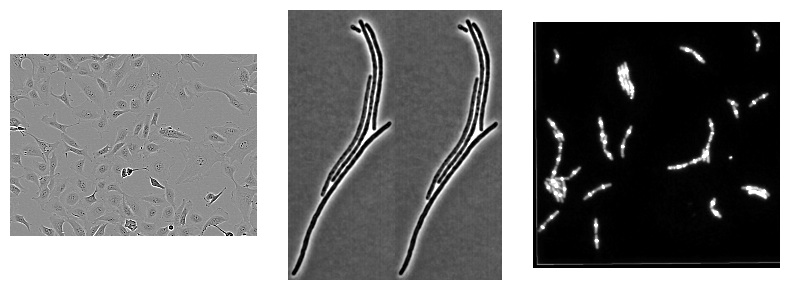

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import utils, io

# download example 2D images from website
url = "http://www.cellpose.org/static/data/imgs_cyto3.npz"
filename = "imgs_cyto3.npz"
utils.download_url_to_file(url, filename)

# download 3D tiff
url = "http://www.cellpose.org/static/data/rgb_3D.tif"
utils.download_url_to_file(url, "rgb_3D.tif")

dat = np.load(filename, allow_pickle=True)["arr_0"].item()

imgs = dat["imgs"]
masks_true = dat["masks_true"]

plt.figure(figsize=(8,3))
for i, iex in enumerate([9, 16, 21]):
    img = imgs[iex].squeeze()
    plt.subplot(1,3,1+i)
    plt.imshow(img[0], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Run Cellpose-SAM

In [4]:
masks_pred, flows, styles = model.eval(imgs, niter=1000) # using more iterations for bacteria


2025-12-24 15:01:00,587 [INFO] 0%|          | 0/24 [00:00<?, ?it/s]
2025-12-24 15:01:00,589 [INFO] processing image with (383, 512) HW, and 3 channels
2025-12-24 15:01:02,551 [INFO] processing image with (376, 400) HW, and 3 channels
2025-12-24 15:01:03,323 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-24 15:01:04,740 [INFO] processing image with (301, 394) HW, and 3 channels
2025-12-24 15:01:05,323 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 15:01:05,904 [INFO] processing image with (333, 333) HW, and 3 channels
2025-12-24 15:01:06,479 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 15:01:07,093 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 15:01:07,798 [INFO] processing image with (256, 256) HW, and 3 channels
2025-12-24 15:01:08,444 [INFO] processing image with (520, 704) HW, and 3 channels
2025-12-24 15:01:10,309 [INFO] processing image with (520, 704) HW, and 3 channels
2025-12-24 15:01:11

### PLot Results

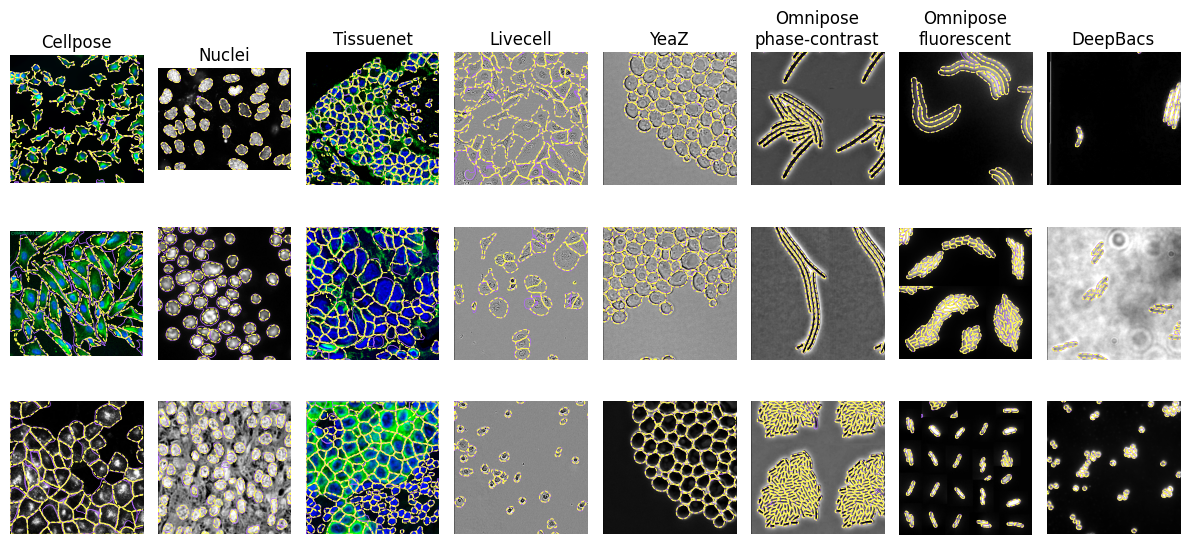

In [5]:
from cellpose import transforms, plot

titles = [
        "Cellpose", "Nuclei", "Tissuenet", "Livecell", "YeaZ",
         "Omnipose\nphase-contrast", "Omnipose\nfluorescent",
        "DeepBacs"
    ]

plt.figure(figsize=(12,6))
ly = 400
for iex in range(len(imgs)):
    img = imgs[iex].squeeze().copy()
    img = np.clip(transforms.normalize_img(img, axis=0), 0, 1) # normalize images across channel axis
    ax = plt.subplot(3, 8, (iex%3)*8 + (iex//3) +1)
    if img[1].sum()==0:
        img = img[0]
        ax.imshow(img, cmap="gray")
    else:
        # make RGB from 2 channel image
        img = np.concatenate((np.zeros_like(img)[:1], img), axis=0).transpose(1,2,0)
        ax.imshow(img)
    ax.set_ylim([0, min(400, img.shape[0])])
    ax.set_xlim([0, min(400, img.shape[1])])


    # GROUND-TRUTH = PURPLE
    # PREDICTED = YELLOW
    outlines_gt = utils.outlines_list(masks_true[iex])
    outlines_pred = utils.outlines_list(masks_pred[iex])
    for o in outlines_gt:
        plt.plot(o[:,0], o[:,1], color=[0.7,0.4,1], lw=0.5)
    for o in outlines_pred:
        plt.plot(o[:,0], o[:,1], color=[1,1,0.3], lw=0.75, ls="--")
    plt.axis('off')

    if iex%3 == 0:
        ax.set_title(titles[iex//3])

plt.tight_layout()
plt.show()

# Run Cellpose-SAM in 3D

There are two ways to run cellpose in 3D:

First way: computes flows from 2D slices and combines into 3D flows to create masks



In [6]:
img_3D = io.imread("rgb_3D.tif")


# 1. computes flows from 2D slices and combines into 3D flows to create masks
masks, flows, _ = model.eval(img_3D, z_axis=0, channel_axis=1,
                                batch_size=32,
                                do_3D=True, flow3D_smooth=1)


2025-12-24 15:02:00,413 [INFO] reading tiff with 150 planes


100%|██████████| 150/150 [00:00<00:00, 10374.58it/s]

2025-12-24 15:02:00,449 [INFO] running YX: 75 planes of size (75, 75)
2025-12-24 15:02:00,449 [INFO] 0%|          | 0/3 [00:00<?, ?it/s]


2025-12-24 15:02:13,049 [INFO] 100%|##########| 3/3 [00:12<00:00,  4.20s/it]
2025-12-24 15:02:13,060 [INFO] running ZY: 75 planes of size (75, 75)
2025-12-24 15:02:24,441 [INFO] 100%|##########| 3/3 [00:11<00:00,  3.79s/it]
2025-12-24 15:02:24,449 [INFO] running ZX: 75 planes of size (75, 75)
2025-12-24 15:02:35,590 [INFO] 100%|##########| 3/3 [00:11<00:00,  3.71s/it]
2025-12-24 15:02:35,602 [INFO] network run in 35.15s
2025-12-24 15:02:35,602 [INFO] smoothing flows with sigma=1
2025-12-24 15:02:36,060 [INFO] masks created in 0.08s


Second way: computes masks in 2D slices and stitches masks in 3D based on mask overlap

Note stitching (with stitch_threshold > 0) can also be used to track cells over time.

In [7]:
# 2. computes masks in 2D slices and stitches masks in 3D based on mask overlap
print('running cellpose 2D + stitching masks')
masks_stitched, flows_stitched, _ = model.eval(img_3D, z_axis=0, channel_axis=1,
                                                  batch_size=32,
                                                  do_3D=False, stitch_threshold=0.5)

running cellpose 2D + stitching masks
2025-12-24 15:02:43,832 [INFO] 100%|##########| 3/3 [00:07<00:00,  2.57s/it]
2025-12-24 15:02:43,832 [INFO] network run in 7.71s
2025-12-24 15:02:48,936 [INFO] 100%|##########| 75/75 [00:05<00:00, 14.72it/s]
2025-12-24 15:02:48,937 [INFO] stitching 75 planes using stitch_threshold=0.500 to make 3D masks


100%|██████████| 74/74 [00:00<00:00, 2645.30it/s]

2025-12-24 15:02:48,975 [INFO] masks created in 5.14s


Results from 3D flows => masks computation

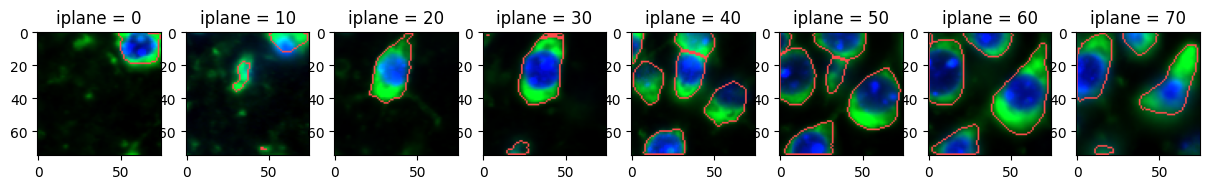

In [8]:
# DISPLAY RESULTS 3D flows => masks
plt.figure(figsize=(15,3))
for i,iplane in enumerate(np.arange(0,75,10,int)):
  img0 = plot.image_to_rgb(img_3D[iplane, [1,0]].copy(), channels=[2,3])
  plt.subplot(1,8,i+1)
  outlines = utils.masks_to_outlines(masks[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)

Results from stitching

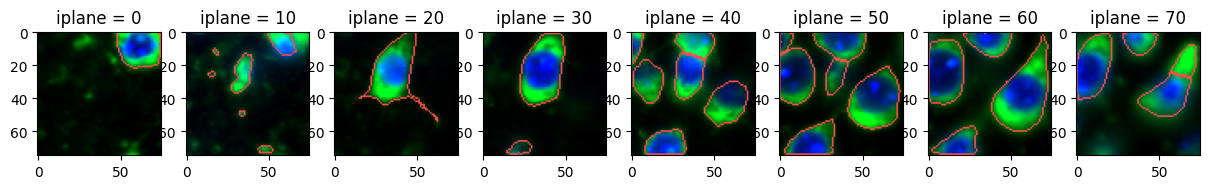

In [9]:
# DISPLAY RESULTS stitching
plt.figure(figsize=(15,3))
for i,iplane in enumerate(np.arange(0,75,10,int)):
  img0 = plot.image_to_rgb(img_3D[iplane, [1,0]].copy(), channels=[2,3])
  plt.subplot(1,8,i+1)
  outlines = utils.masks_to_outlines(masks_stitched[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)